In [163]:
# Import packages 
import pandas as pd
%matplotlib inline
import numpy as np
import statistics

DATAPATH = 'C:/Users/hmiravenkatesh/Desktop/GA/unit-2_project-master/unit-2_project-master/data/imdb_1000.csv'

# Q1: Read in 'imdb_1000.csv' and store it in a DataFrame named movies

#Answer:
movies = pd.read_csv(DATAPATH, sep =",")
movies.head(4)


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [4]:
# Q2: Check the number of rows and columns.

# Answer: 
movies.shape # there are 976 rows and 6 columns.


(979, 6)

In [53]:
# Q3: Check the data type of each column.

#  Answers:

pd.DataFrame(movies.dtypes, columns=["Data Types"])
# star_rating = float; title = object; content_rating = object; genre = object; duration = integer; actors_list = object

,Data Types
star_rating,float64
title,object
content_rating,object
genre,object
duration,int64
actors_list,object


In [5]:
# Q4: Calculate the average movie duration

# Answer: 
movies.duration.isnull().sum() # check for NA's first
movies.duration.mean() # calculate the average movie duration

# Average movie duration = 120.97957099080695 minutes



120.97957099080695

In [55]:
# Q5: Sort the DataFrame by duration to find the shortest and longest movies.

#Answer:

movies.sort_values(by='duration', ascending=True).head(1) # find the shortest movie by sorting in ascending order.

# The shortest movie is 'Freaks' with a duration of 64 minutes.

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [56]:
movies.sort_values(by='duration', ascending=False).head(1) # find the longest movie by sorting in descending order.

# The longest movie is "Hamlet" with a duration of 242 minutes.`


,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


Text(0.5, 0, 'duration')

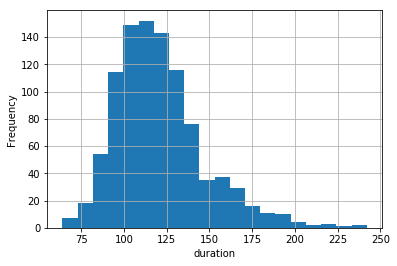

In [6]:
# Q6: Create a histogram of duration, choosing an "appropriate" number of bins.

# Answer:
movies_hist = movies.duration.plot.hist(grid=True, bins=20, rwidth=1.0)
movies_hist.set_xlabel("duration")


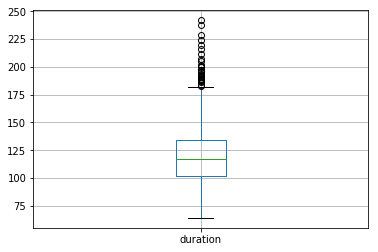

In [12]:
# Q7: Use a box plot to display that same data.

#Answer: 
movies_boxplot = movies.boxplot(column=['duration'])


In [16]:
# Q8: Count how many movies have each of the content ratings.


# Answer:
content_count = movies.groupby(['content_rating']).content_rating.count()
content_count

            # APPROVED      47
            # G             32
            # GP             3
            # NC-17          7
            # NOT RATED     65
            # PASSED         7
            # PG           123
            # PG-13        189
            # R            460
            # TV-MA          1
            # UNRATED       38
            # X              4

            

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: content_rating, dtype: int64

Text(0, 0.5, 'Number of Movies')

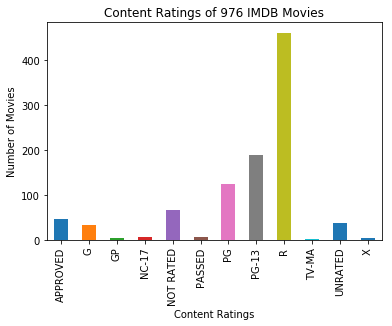

In [59]:

# Q9: Use a visualization to display that same data, including a title and x and y labels.

# Answer: See visualization below
content_bar = content_count.plot.bar(x="x", title='Content Ratings of 976 IMDB Movies')
content_bar.set_xlabel("Content Ratings")
content_bar.set_ylabel("Number of Movies")




In [60]:
# Q10: Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP

# Answer: See output below:
movies['content_rating']=movies['content_rating'].replace(["NOT RATED", "APPROVED", "PASSED", "GP"], "UNRATED")
movies.content_rating.value_counts()



R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

In [71]:
# Q11: Convert the following content ratings to "NC-17": X, TV-MA.

# Answer: See output below: 
movies['content_rating']=movies['content_rating'].replace(["X", "TV-MA"], "NC-17")
movies.content_rating.value_counts()


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         12
PASSED         7
GP             3
Name: content_rating, dtype: int64

In [14]:
# Q12: Count the number of missing values in each column.

# Answer : See output below
pd.DataFrame(movies.isnull().sum(), columns=['Count of Nulls By Column'])


,Count of Nulls By Column
star_rating,0
title,0
content_rating,3
genre,0
duration,0
actors_list,0


In [87]:
# Q13: If there are missing values: examine them, then fill them in with "reasonable" values.

# Answer: See output below
movies = movies.fillna(value={'content_rating': 'No Content Rating Available'})
movies['content_rating'].value_counts()



R                              460
PG-13                          189
PG                             123
NOT RATED                       65
APPROVED                        47
UNRATED                         38
G                               32
NC-17                            7
PASSED                           7
X                                4
No Content Rating Available      3
GP                               3
TV-MA                            1
Name: content_rating, dtype: int64

In [89]:
# Q14: Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours

movies[movies['duration'] >= 120].star_rating.mean() # average star rating for movies for 2 hours or longer.


7.953669724770622

In [98]:
movies[movies['duration'] < 120].star_rating.mean() # average star rating for movies shorter than 3 hours

# Answer: It seems like shorter movies have a slighly lower rating.

7.838666666666657

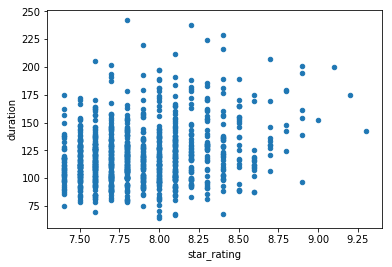

In [106]:
# Q15: Use a visualization to detect whether there is a relationship between duration and star rating.
movies.plot.scatter(x='star_rating', y='duration')

# Answer: There does ot seem to be a clear cut pattern and star rating is not continuous, so the comparison does not seem straightforward.

In [94]:
# Q16: Calculate the average duration for each genre.

# Answer: See output below
movies.groupby('genre').duration.mean()


genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

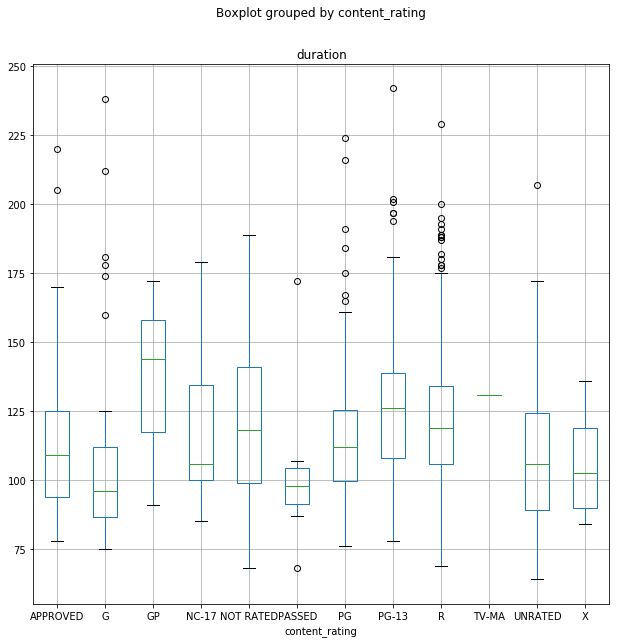

In [30]:
# Q17: Visualize the relationship between content rating and duration

# Answer: I attempt to ifer the spread of duration by content rating.
movies.content_rating.value_counts()
movies_content_boxplot = movies.boxplot(column=['duration'], by='content_rating', figsize=(10,10))



In [80]:
# Q18: Determine the top rated movie (by star rating) for each genre.

# Answer:

movies.sort_values('star_rating', ascending=False).groupby('genre').title.head(1)




0                           The Shawshank Redemption
3                                    The Dark Knight
5                                       12 Angry Men
6                     The Good, the Bad and the Ugly
7      The Lord of the Rings: The Return of the King
8                                   Schindler's List
39                                            Psycho
38                                       Rear Window
35                                      Modern Times
30                                     Spirited Away
105                                    The Third Man
145                                     Blade Runner
350                                Shadow of a Doubt
338                              Battleship Potemkin
468                       E.T. the Extra-Terrestrial
638                        The City of Lost Children
Name: title, dtype: object

In [102]:
# Q19: Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates

movies['is_duplicate'] = movies['title'].duplicated()
movies[movies['is_duplicate']==True]

# the supposed duplicate movies are: The Girl with the Dragon Tattoo, Dracula, Les Miserables and True Grit.

#Checking if these duplicates are acually duplicates
movies[movies['title']=='Dracula'] # cast list and duration are different so probably are different versions of the same movie made in different years
movies[movies['title']=='The Girl with the Dragon Tattoo'] # cast list and durating are different. I know this one, one of these movies is the Swedish edition and the other is the international edition.
movies[movies['title']=='Les Miserables'] # cast list and duration are different - different movies.
movies[movies['title']=='True Grit'] # cast list and duration are different - different movies.

# All these movies are different.

,star_rating,title,content_rating,genre,duration,actors_list,is_duplicate
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",False
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",True


In [164]:
# Bonus: Find something interesting using the actors data

# I am interested in seeing which actor acted in the most movies on this list. But I need to do some string cleaning first

movies_actors= movies["actors_list"].str.split(",")

actor_list = []
for i in range(0,len(movies_actors)):
    
    cast_list = movies_actors[i]
    for actor in cast_list:
        actor_list.append(actor)


# find the most common actor in movies
    
statistics.mode(actor_list)
# Robert De Niro is the most common actor to act in this list of movies

"[u'Robert De Niro'"